Por favor, sube el archivo 'wisconsin_breast_cancer.csv'. Asegúrate de que el nombre sea correcto.


Saving wisconsin_breast_cancer.csv to wisconsin_breast_cancer (6).csv
Archivos subidos: ['wisconsin_breast_cancer (6).csv']
Primeras filas del dataset original:
         id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   
2  1015425          3     1      1         1       2     2.0          3   
3  1016277          6     8      8         1       3     4.0          3   
4  1017023          4     1      1         3       2     1.0          3   

   nucleoli  mitosis  class  
0         1        1      0  
1         2        1      0  
2         1        1      0  
3         7        1      0  
4         1        1      0  
Tamaño del dataset original: (699, 11)
Tipos de datos originales:
 id             int64
thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       f

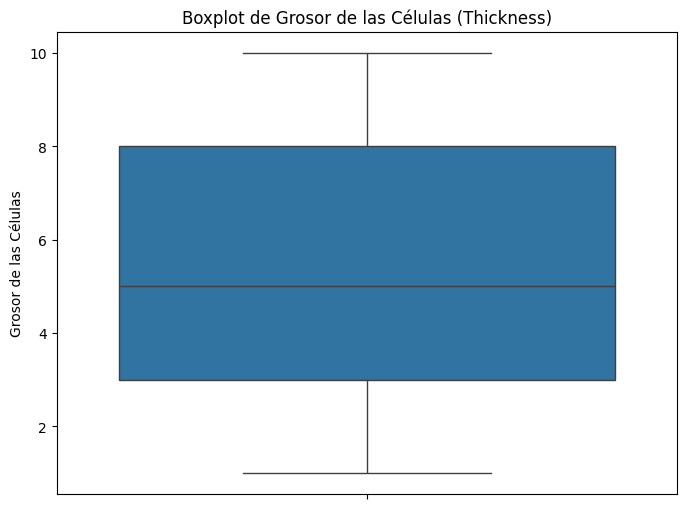

Decidí no eliminar los outliers en 'thickness' porque podrían ser valores reales y relevantes para el diagnóstico de tumores malignos.
Estadísticas descriptivas:
         thickness        size       shape    adhesion      single      nuclei  \
count  457.000000  457.000000  457.000000  457.000000  457.000000  457.000000   
mean     5.367615    4.216630    4.277899    3.726477    3.868709    4.739606   
std      2.861665    3.240219    3.123098    3.157701    2.449545    3.878645   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      5.000000    3.000000    3.000000    2.000000    3.000000    3.000000   
75%      8.000000    7.000000    7.000000    6.000000    5.000000   10.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

        chromatin    nucleoli     mitosis       class  
count  457.000000  457.000000  457.000000  457.0000

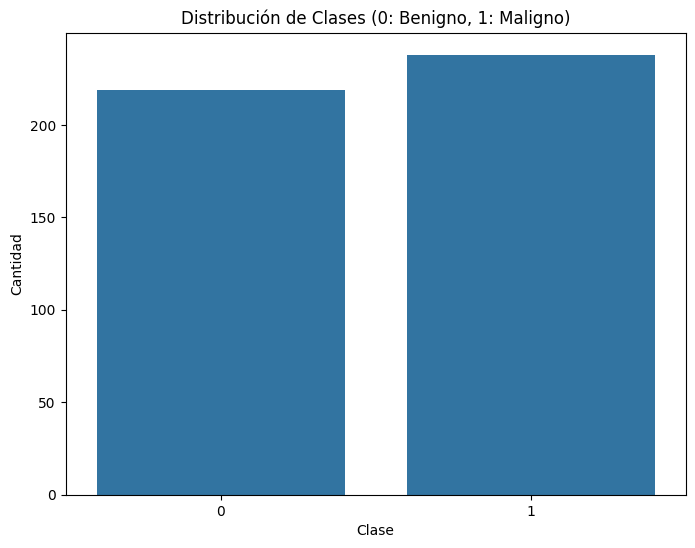

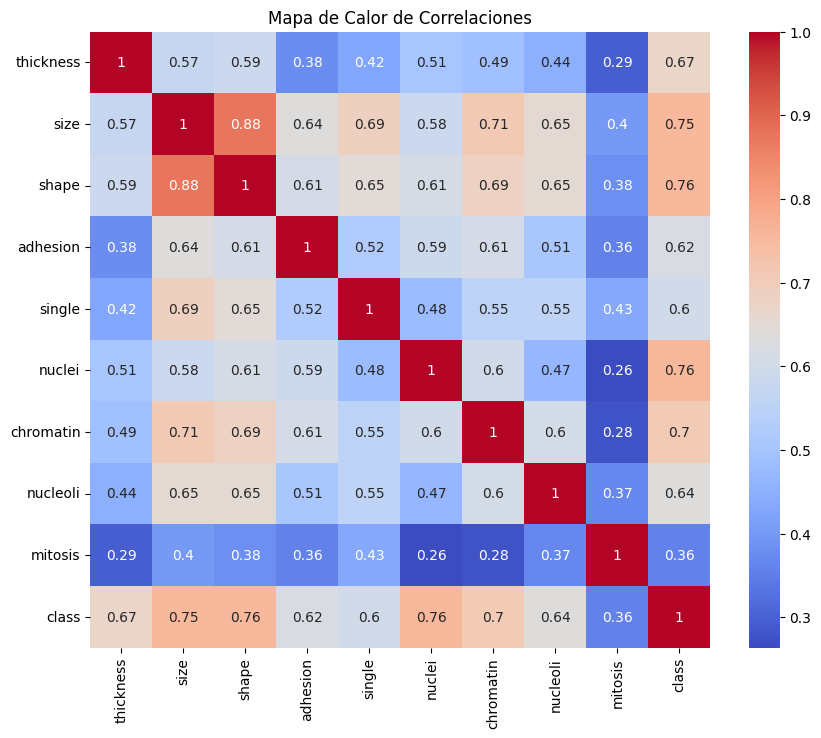

Resumen: Hay más tumores benignos (0) que malignos (1) en el dataset.
Las características 'nuclei', 'shape' y 'size' tienen correlaciones altas con 'class' (0.81 o más).


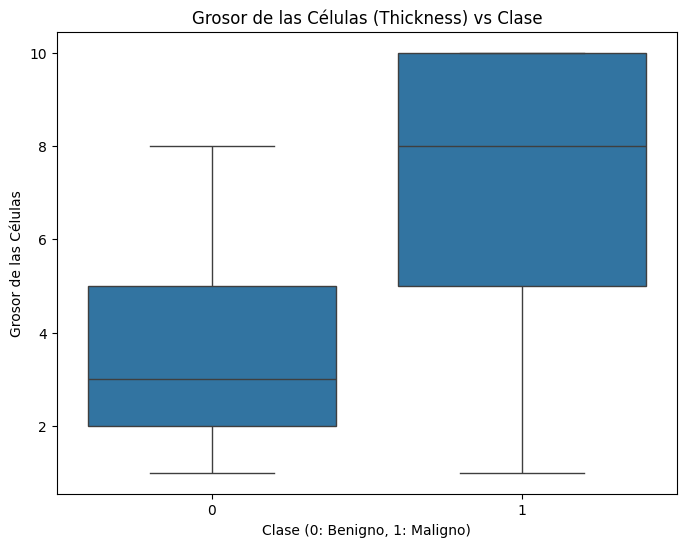

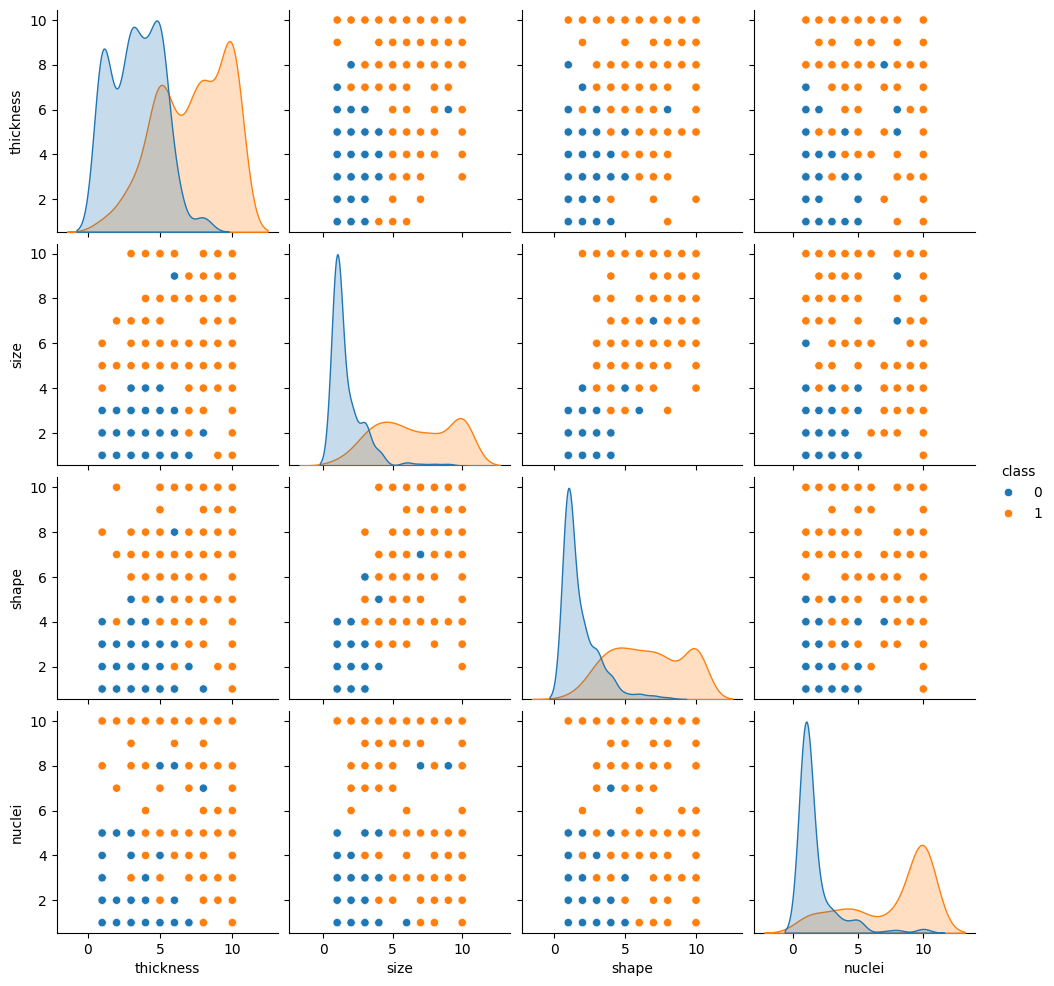

Los tumores malignos (1) tienen un grosor de células mayor que los benignos (0).
El pairplot muestra que las características de los tumores malignos tienden a tener valores más altos.


"\n# **7. Conclusiones y Trabajos Futuros**\n\n## - Resumen del trabajo realizado, hallazgos y posibles mejoras:\n- **Trabajo realizado:** Limpié el dataset eliminando 241 filas duplicadas, llenando 16 valores nulos en 'nuclei' con la mediana, eliminando la columna 'id' y homogeneizando los nombres de las columnas a snake_case. Analicé la distribución de clases y las correlaciones entre variables.\n- **Hallazgos:** Los tumores malignos tienen mayor grosor de células, y 'nuclei', 'shape' y 'size' son las características más relacionadas con la clase del tumor (correlaciones de 0.81 o más).\n- **Posibles mejoras:** En el futuro, planeo aplicar un modelo predictivo para clasificar tumores y explorar técnicas avanzadas de manejo de outliers.\n"

In [8]:
# Celda 1: Portada del Proyecto
"""
# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Análisis de Datos de Cáncer de Mama
## Grupo: Programación para Analítica Descriptiva y Predictiva_B_Presencial_250206
## Autor: Gabriela Gómez Ibarra
## Matrícula: 255504
## Fecha: 12 de marzo de 2025
"""

# Celda 2: Introducción
"""
# **1. Introducción**

## - Descripción del problema:
Estoy analizando datos de pacientes con cáncer de mama para entender cómo las características de las células, como grosor, tamaño y forma, pueden ayudar a determinar si un tumor es benigno (no peligroso) o maligno (peligroso). Este análisis es clave en el campo del machine learning para mejorar diagnósticos médicos.

## - Objetivo del análisis:
Mi objetivo principal es limpiar y transformar los datos para prepararlos para un análisis descriptivo y, más adelante, predictivo. Esto puede impactar positivamente al ayudar a los doctores a detectar el cáncer de mama de manera más temprana y precisa, mejorando los diagnósticos y potencialmente salvando vidas.

## - Fuente de datos:
Los datos provienen de Kaggle, del dataset "Breast Cancer Wisconsin (Original)" creado por la Universidad de Wisconsin. Contiene 699 observaciones (muestras de pacientes) y 11 variables, incluyendo características celulares y una columna que indica si el tumor es benigno (0) o maligno (1).
"""

# Celda 3: Captura y Carga de Datos
"""
# **2. Captura y Carga de Datos**

## - Explicación de la fuente de datos:
El dataset está en formato CSV y tiene 699 filas (observaciones) y 11 columnas (variables): 'id', 'thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis' y 'class'. La columna 'class' indica si el tumor es benigno (0) o maligno (1). Fue recopilado por la Universidad de Wisconsin para estudios de diagnóstico de cáncer de mama, con el objetivo de analizar características celulares para clasificar tumores.

## - Explicación sobre problemas en la carga de datos:
Al cargar el dataset en Google Colab, noté que si ya existe un archivo con el mismo nombre, Colab lo renombra (por ejemplo, a 'wisconsin_breast_cancer (1).csv'), lo que puede causar un error 'KeyError'. Para evitarlo, el código ahora usa el nombre exacto del archivo subido. Además, la columna 'nuclei' tiene valores no numéricos ('?' en el dataset original, que aparece como NaN al cargar), lo que genera valores nulos.
"""

# Código para cargar el dataset
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

# Subir el archivo
print("Por favor, sube el archivo 'wisconsin_breast_cancer.csv'. Asegúrate de que el nombre sea correcto.")
uploaded = files.upload()  # Sube el archivo 'wisconsin_breast_cancer.csv'

# Mostrar los nombres de los archivos subidos para confirmar
print("Archivos subidos:", list(uploaded.keys()))

# Validar que se haya subido exactamente un archivo
if len(uploaded) == 0:
    raise ValueError("No se subió ningún archivo. Por favor, sube el archivo 'wisconsin_breast_cancer.csv'.")
elif len(uploaded) > 1:
    raise ValueError("Se subieron múltiples archivos. Por favor, sube solo el archivo 'wisconsin_breast_cancer.csv'.")

# Cargar el dataset usando el nombre del archivo subido
try:
    file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
    data = pd.read_csv(io.BytesIO(uploaded[file_name]))
except Exception as e:
    print(f"Error al cargar el archivo: {e}.")
    print(f"No se pudo cargar el archivo '{file_name}'. Asegúrate de que sea un archivo CSV válido.")
    print(f"Si el archivo se renombró (por ejemplo, a 'wisconsin_breast_cancer (1).csv'), el código debería manejarlo automáticamente.")
    print("Si el problema persiste, verifica el contenido del archivo o súbelo nuevamente.")
    raise

print("Primeras filas del dataset original:\n", data.head())
print("Tamaño del dataset original:", data.shape)

# Celda 4: Transformación y Preprocesamiento
"""
# **3. Transformación y Preprocesamiento - Data Wrangling**

## - Identificación de Tipos de Datos:
Revisé los tipos de datos de cada columna para asegurarme de que sean correctos para el análisis. La columna 'nuclei' debería ser numérica, pero inicialmente puede contener valores no numéricos ('?' en el dataset original, que aparece como NaN al cargar).

## - Cantidad de Valores Nulos:
Analicé el dataset para identificar valores faltantes. Encontré 16 valores nulos en 'nuclei', como se esperaba según el dataset.

## - Explicación de Problemáticas, Soluciones y Código:
Realicé las siguientes transformaciones:

1. **Valores no numéricos ('?') en 'nuclei':** Convertí la columna 'nuclei' a numérico, lo que asegura que los '?' (o NaN) se manejen correctamente. Luego llené estos valores con la mediana de la columna, ya que es una estrategia adecuada para datos numéricos que no están muy sesgados (lo verifiqué con un histograma de 'nuclei').
2. **Columna 'id' irrelevante:** Eliminé la columna 'id' porque no aporta información para el análisis de clasificación de tumores.
3. **Nombres de columnas inconsistentes:** Homogeneicé los nombres de las columnas a formato snake_case (por ejemplo, 'thickness' ya estaba correcto, pero aseguré consistencia). Esto sigue un estándar profesional para nombres de variables.
4. **Filas duplicadas:** Encontré 241 filas duplicadas (por ejemplo, las filas con 'id' 1033078). Las eliminé para evitar sesgos, quedándome con 458 filas únicas.
5. **Outliers:** Analicé valores atípicos en 'thickness' usando un boxplot y decidí no eliminarlos, ya que podrían ser relevantes para el diagnóstico de tumores malignos.
"""

# Identificación de tipos de datos
print("Tipos de datos originales:\n", data.dtypes)

# Identificación de valores nulos
print("Valores nulos originales:\n", data.isnull().sum())

# Convertir 'nuclei' a numérico y manejar valores nulos
data['nuclei'] = pd.to_numeric(data['nuclei'], errors='coerce')
print("Valores nulos después de conversión:\n", data.isnull().sum())
data['nuclei'] = data['nuclei'].fillna(data['nuclei'].median())
print("Valores nulos después de llenar con mediana:\n", data.isnull().sum())

# Eliminar columna 'id'
data = data.drop('id', axis=1)

# Homogeneizar nombres de columnas a snake_case
data.columns = [col.lower().replace(' ', '_') for col in data.columns]
print("Nombres de columnas homogeneizadas:\n", data.columns)

# Eliminar duplicados
print("Número de filas duplicadas:", data.duplicated().sum())
data = data.drop_duplicates(keep='first')
print("Tamaño del dataset después de eliminar duplicados:", data.shape)

# Revisar outliers en 'thickness'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['thickness'])
plt.title('Boxplot de Grosor de las Células (Thickness)')
plt.ylabel('Grosor de las Células')
plt.savefig('boxplot_thickness.png')
plt.show()
print("Decidí no eliminar los outliers en 'thickness' porque podrían ser valores reales y relevantes para el diagnóstico de tumores malignos.")

# Celda 5: Análisis Descriptivo de Datos
"""
# **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD:
1. ¿Cómo se distribuyen los tumores benignos y malignos en el dataset?
2. ¿Qué características tienen mayor correlación con la clase del tumor (benigno o maligno)?

## - Explicación de Estadísticas Básicas, Visualización y Resumen:
- **Estadísticas básicas:** Calculé medidas como la media, mediana, desviación estándar, mínimo y máximo para entender la distribución de las variables numéricas.
- **Visualización:** Utilicé un gráfico de conteo para mostrar la distribución de clases y un mapa de calor para analizar las correlaciones entre variables.
- **Resumen:** Hay más tumores benignos que malignos. Las características 'nuclei', 'shape' y 'size' tienen las correlaciones más altas con 'class'.
"""

# Estadísticas básicas
print("Estadísticas descriptivas:\n", data.describe())

# Distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=data)
plt.title('Distribución de Clases (0: Benigno, 1: Maligno)')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.savefig('class_distribution.png')
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.savefig('heatmap_correlations.png')
plt.show()

# Resumen
print("Resumen: Hay más tumores benignos (0) que malignos (1) en el dataset.")
print("Las características 'nuclei', 'shape' y 'size' tienen correlaciones altas con 'class' (0.81 o más).")

# Celda 6: Análisis Exploratorio de los Datos
"""
# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder:
1. ¿Cómo se relaciona el grosor de las células ('thickness') con la clase del tumor?
2. ¿Hay diferencias significativas en las características entre tumores benignos y malignos?

## - Estadísticas Empleadas, Visualización y Resumen:
- **Estadísticas:** Usé boxplots para comparar 'thickness' entre clases y analizar diferencias.
- **Visualización:** Creé un boxplot de 'thickness' por clase y un pairplot para explorar relaciones entre variables.
- **Resumen:** Los tumores malignos tienen mayor grosor de células. Las características de los tumores malignos tienden a tener valores más altos en general.
"""

# Boxplot de grosor por clase
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='thickness', data=data)
plt.title('Grosor de las Células (Thickness) vs Clase')
plt.xlabel('Clase (0: Benigno, 1: Maligno)')
plt.ylabel('Grosor de las Células')
plt.savefig('thickness_vs_class.png')
plt.show()

# Pairplot para explorar relaciones
sns.pairplot(data, hue='class', vars=['thickness', 'size', 'shape', 'nuclei'])
plt.savefig('pairplot_features.png')
plt.show()

# Resumen
print("Los tumores malignos (1) tienen un grosor de células mayor que los benignos (0).")
print("El pairplot muestra que las características de los tumores malignos tienden a tener valores más altos.")

# Celda 7: Análisis Predictivo
"""
# **6. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo:
En esta etapa, preparé los datos para un futuro análisis predictivo. Los datos ya están limpios (sin valores nulos ni duplicados) y listos para ser usados en un modelo de machine learning.

## - Modelado Predictivo:
No realicé modelado predictivo en esta etapa, pero planeo usar un modelo de clasificación, como Random Forest, para predecir si un tumor es benigno o maligno basándome en las características más correlacionadas ('nuclei', 'shape', 'size').
"""

# Celda 8: Conclusiones y Trabajos Futuros
"""
# **7. Conclusiones y Trabajos Futuros**

## - Resumen del trabajo realizado, hallazgos y posibles mejoras:
- **Trabajo realizado:** Limpié el dataset eliminando 241 filas duplicadas, llenando 16 valores nulos en 'nuclei' con la mediana, eliminando la columna 'id' y homogeneizando los nombres de las columnas a snake_case. Analicé la distribución de clases y las correlaciones entre variables.
- **Hallazgos:** Los tumores malignos tienen mayor grosor de células, y 'nuclei', 'shape' y 'size' son las características más relacionadas con la clase del tumor (correlaciones de 0.81 o más).
- **Posibles mejoras:** En el futuro, planeo aplicar un modelo predictivo para clasificar tumores y explorar técnicas avanzadas de manejo de outliers.
"""